In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


### Uploading CSV

In [2]:
df=pd.read_csv('train.csv')

In [3]:
features=df.columns
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### Checking Zeros

In [5]:
def check_zeros(df,features):
    zeros={}
    for i in features:
        zeros[i]=df[df[i]==0].index
    return zeros
        
z=check_zeros(df,features)
print(z)

{'battery_power': Index([], dtype='int64'), 'blue': Index([   0,    5,    6,    7,   12,   14,   15,   16,   17,   20,
       ...
       1979, 1981, 1982, 1983, 1984, 1989, 1991, 1994, 1997, 1998],
      dtype='int64', length=1010), 'clock_speed': Index([], dtype='int64'), 'dual_sim': Index([   0,    3,    4,    6,    8,   11,   12,   13,   14,   15,
       ...
       1982, 1985, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1998],
      dtype='int64', length=981), 'fc': Index([   1,    3,    7,    8,   10,   25,   30,   33,   34,   45,
       ...
       1957, 1960, 1966, 1968, 1970, 1971, 1984, 1993, 1995, 1996],
      dtype='int64', length=474), 'four_g': Index([   0,    3,    5,    7,    8,   10,   12,   13,   15,   18,
       ...
       1982, 1983, 1984, 1985, 1988, 1989, 1992, 1993, 1994, 1996],
      dtype='int64', length=957), 'int_memory': Index([], dtype='int64'), 'm_dep': Index([], dtype='int64'), 'mobile_wt': Index([], dtype='int64'), 'n_cores': Index([], dtype='int64'), 'pc': I

### EDA

Ploting Pie Charts

I cant


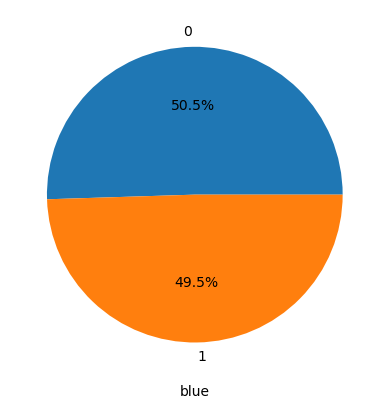

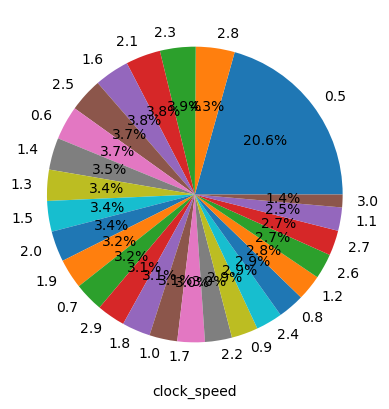

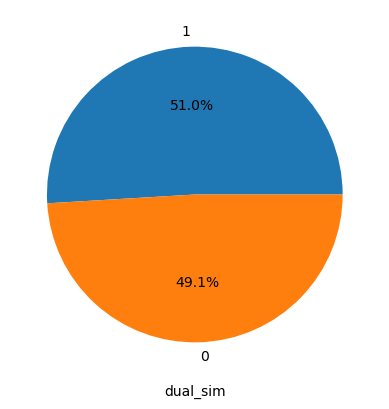

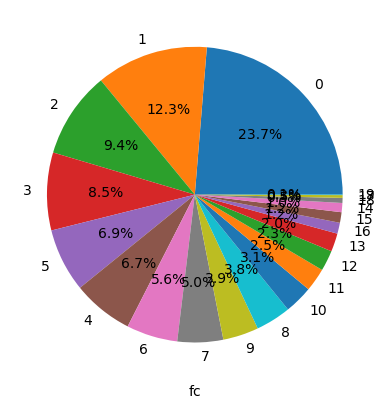

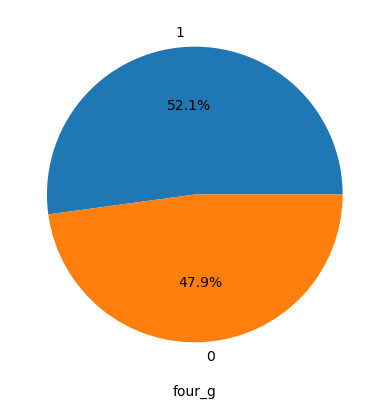

I cant


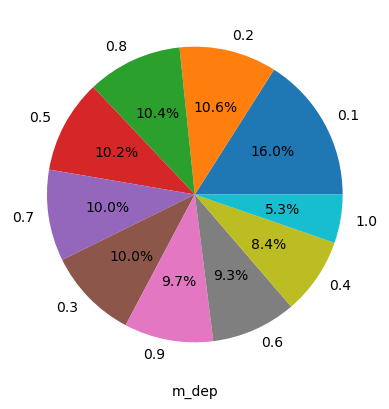

I cant


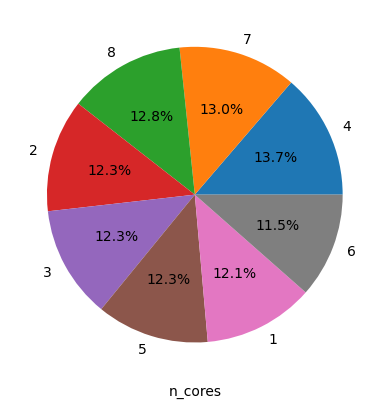

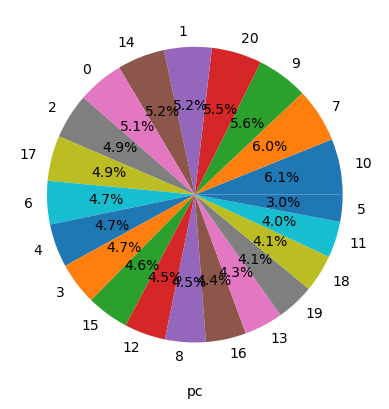

I cant
I cant
I cant


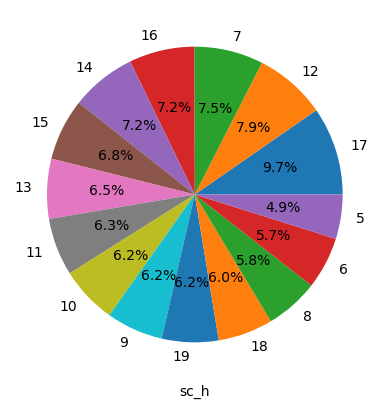

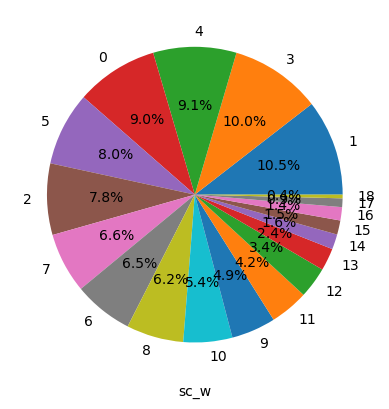

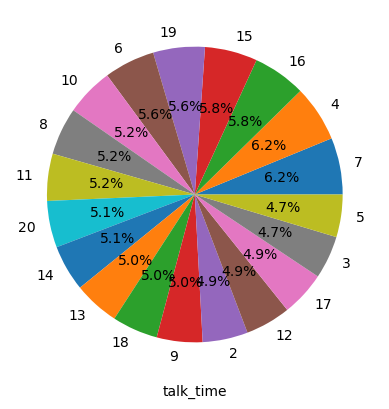

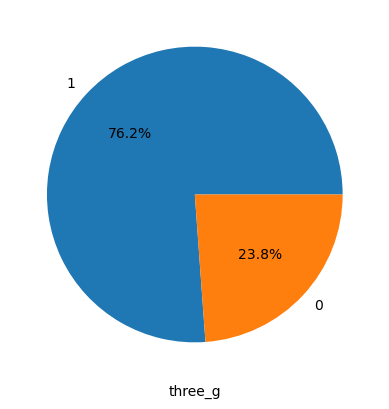

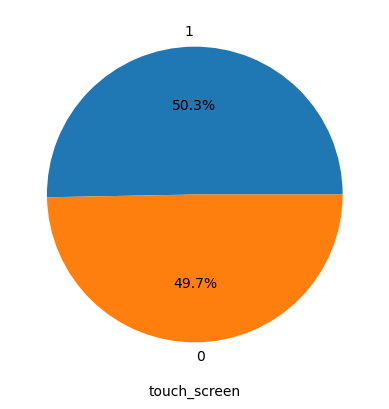

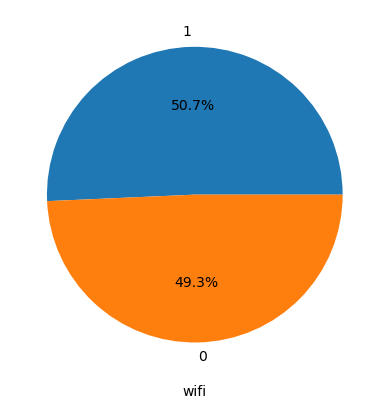

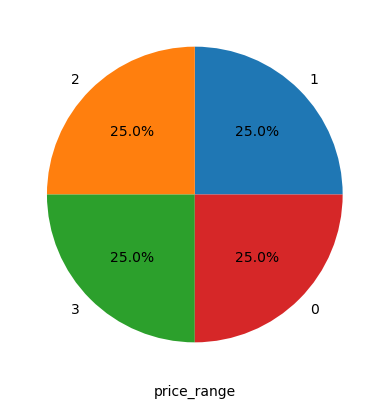

In [6]:
for i in features:
    if (df[i].nunique())>60:
        print('I cant')
    else:
        plt.subplot
        a=df[i].value_counts().tolist()
        b=df[i].value_counts().index.tolist()
        plt.pie(x=a, labels=b,autopct='%1.1f%%')
        plt.xlabel(i)
        plt.show()

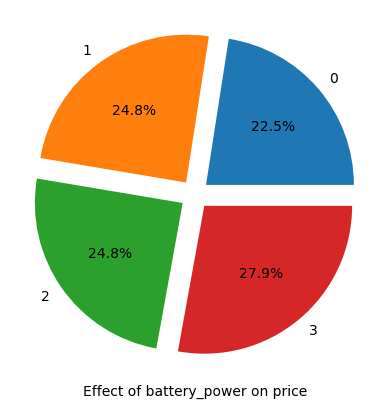

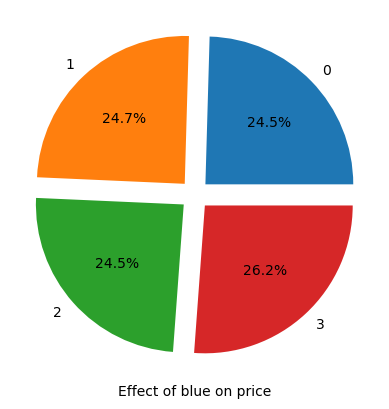

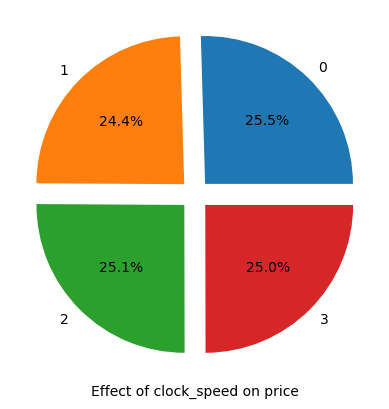

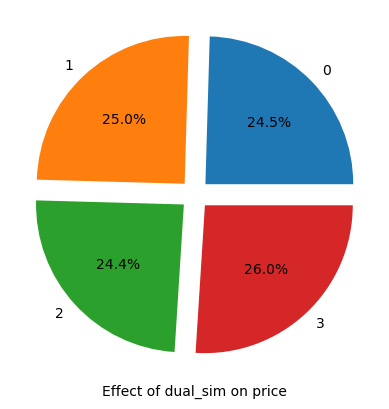

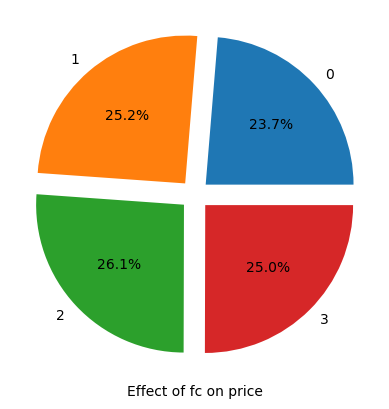

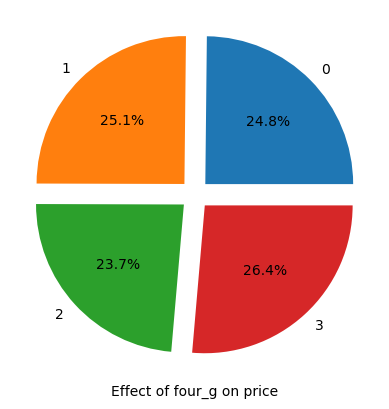

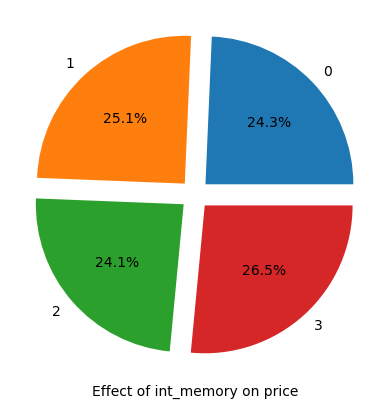

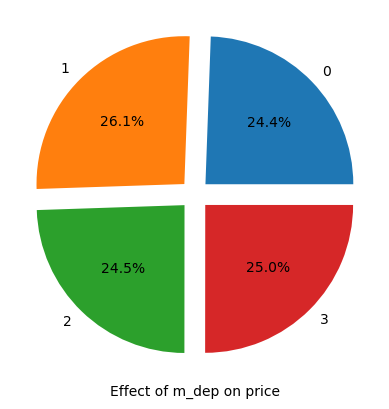

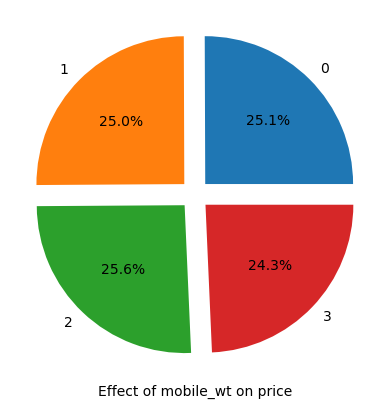

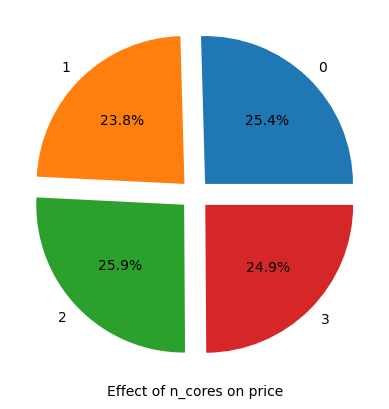

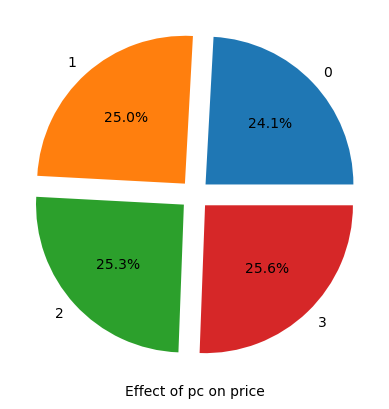

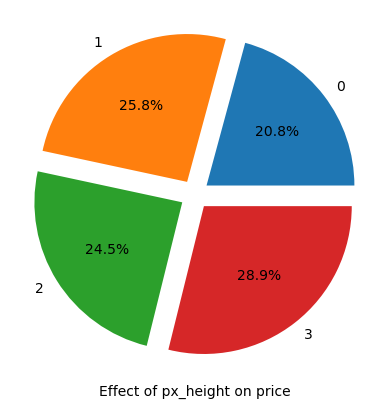

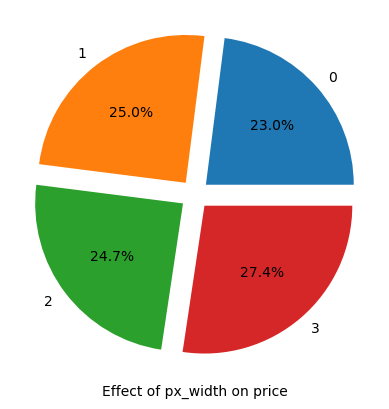

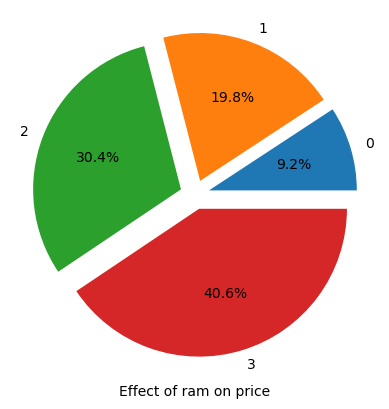

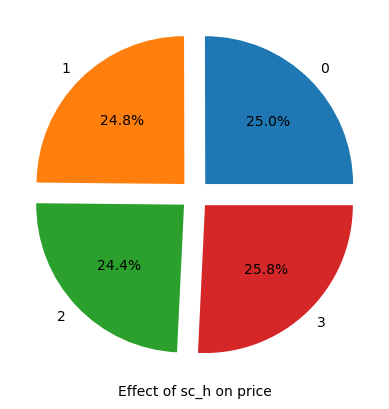

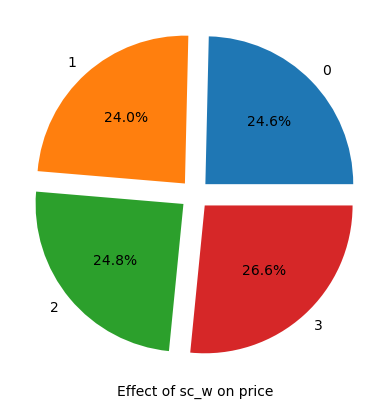

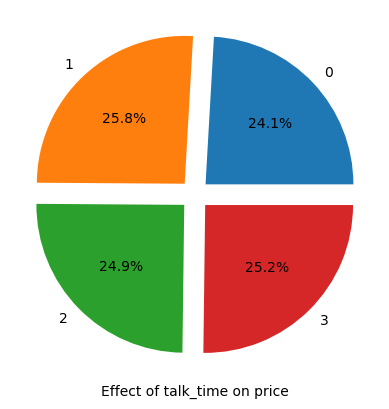

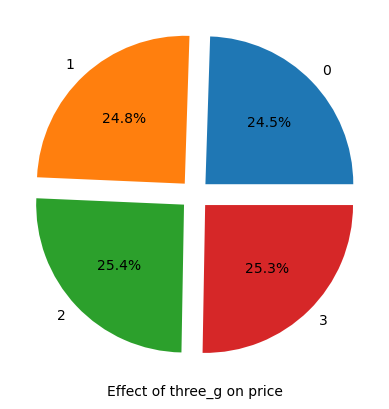

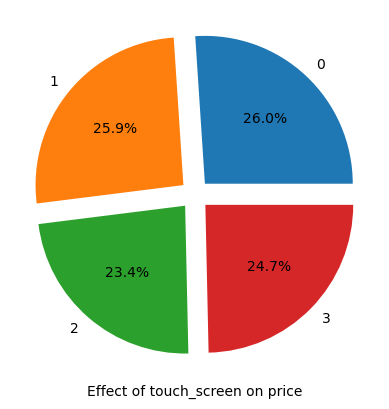

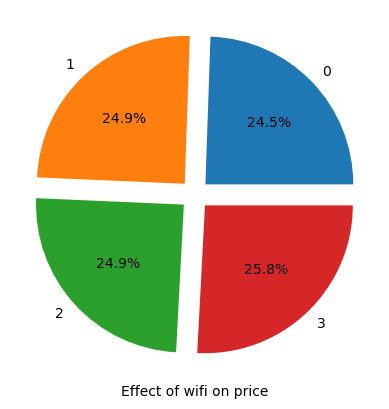

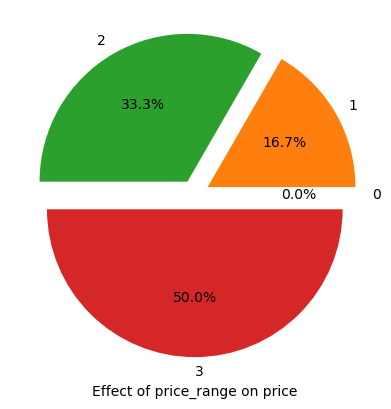

In [7]:
explode=[0.1,0.1,0.1,0.1]
for i in features:
    a=[]
    b=[]
    s=df.groupby('price_range')[i].sum()
    b=s.index.to_list()
    a=s.to_list()
    plt.pie(x=a, labels=b,autopct='%1.1f%%',explode=explode)
    plt.xlabel('Effect of {} on price'.format(i))
    plt.show()

<Figure size 2000x625.8 with 0 Axes>

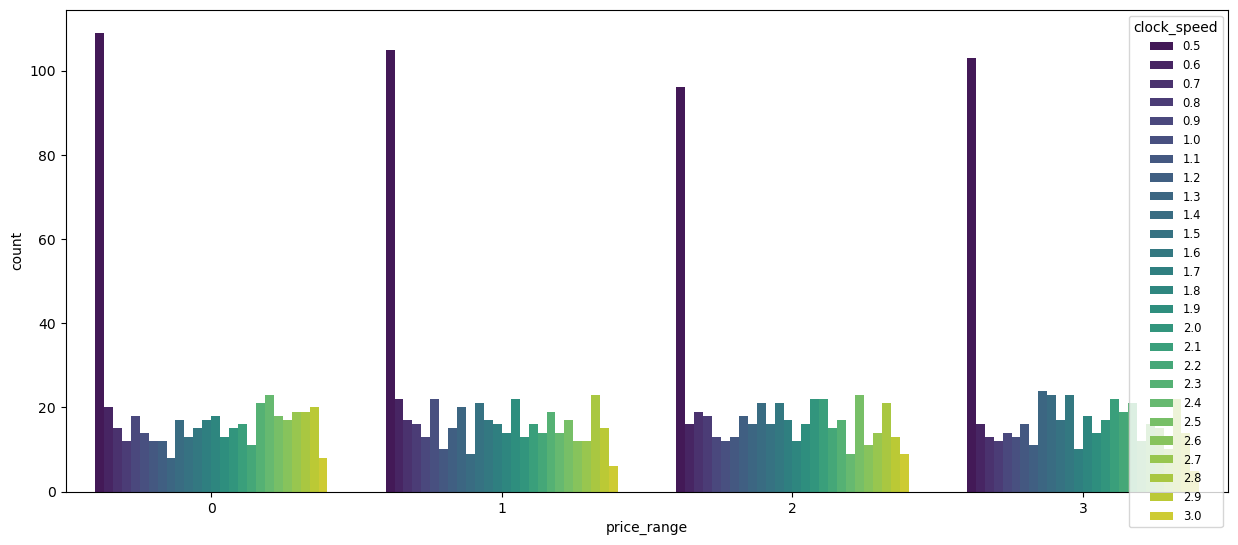

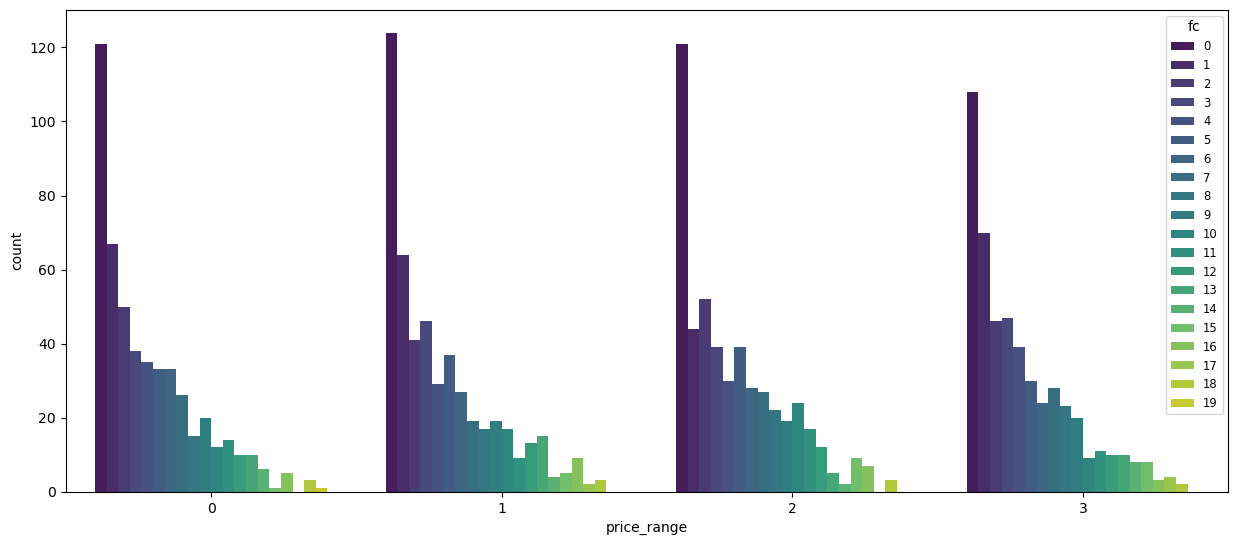

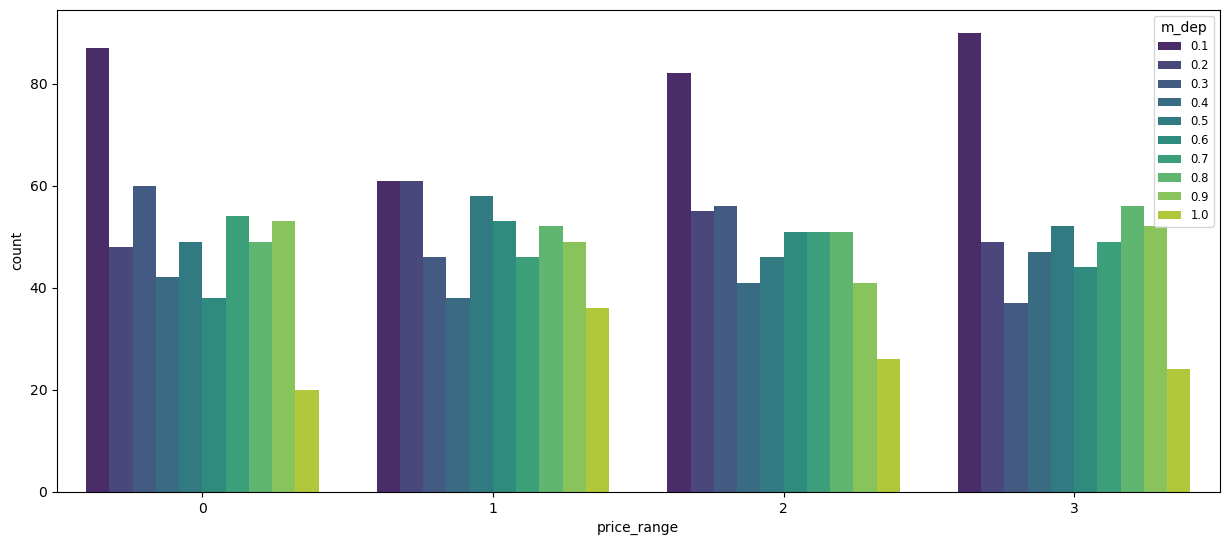

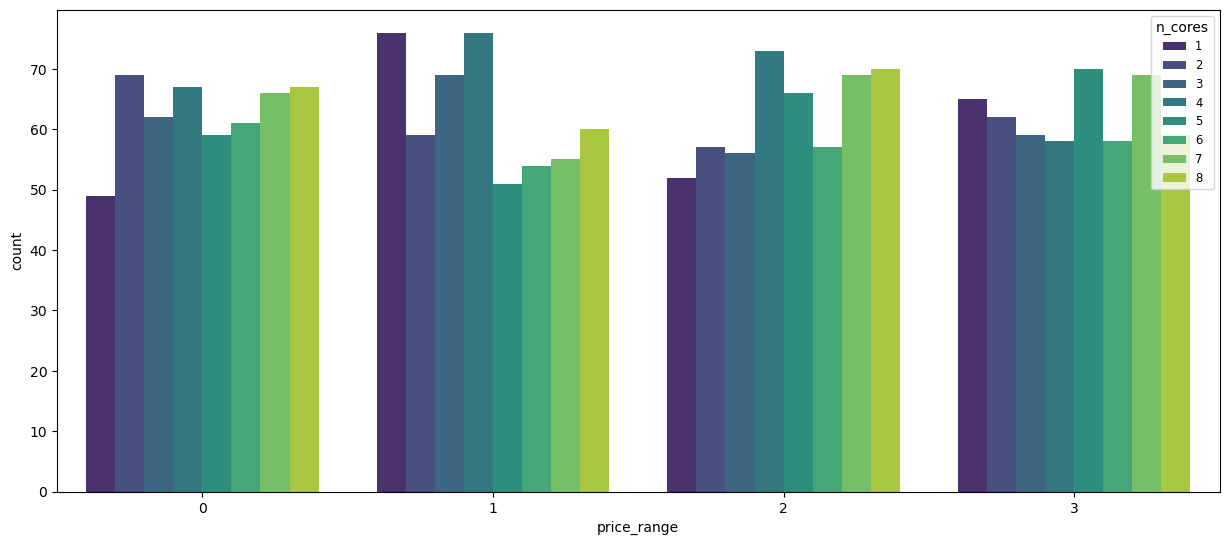

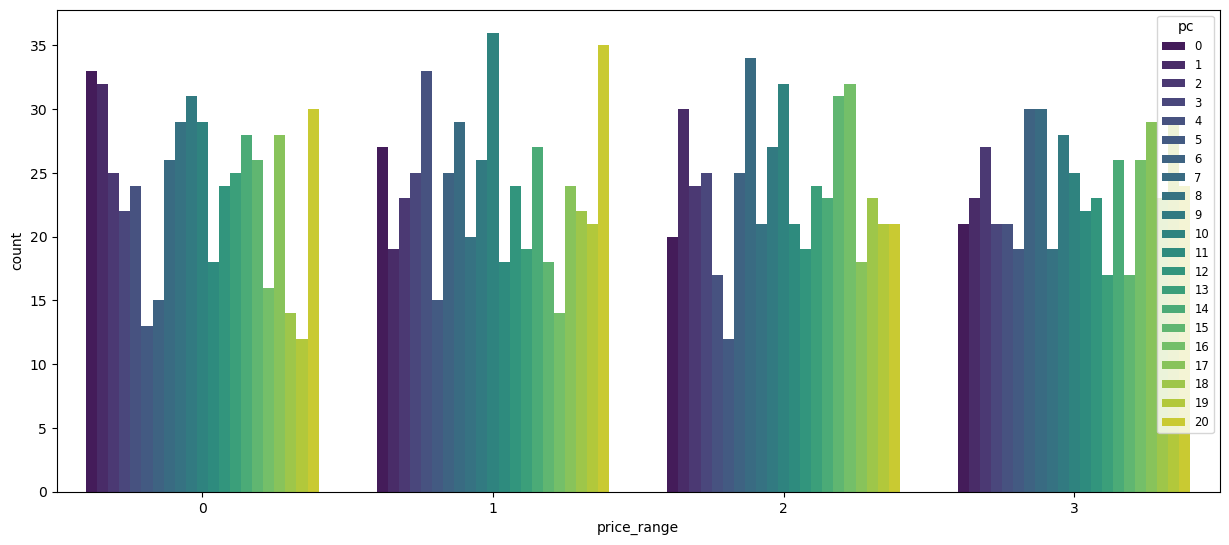

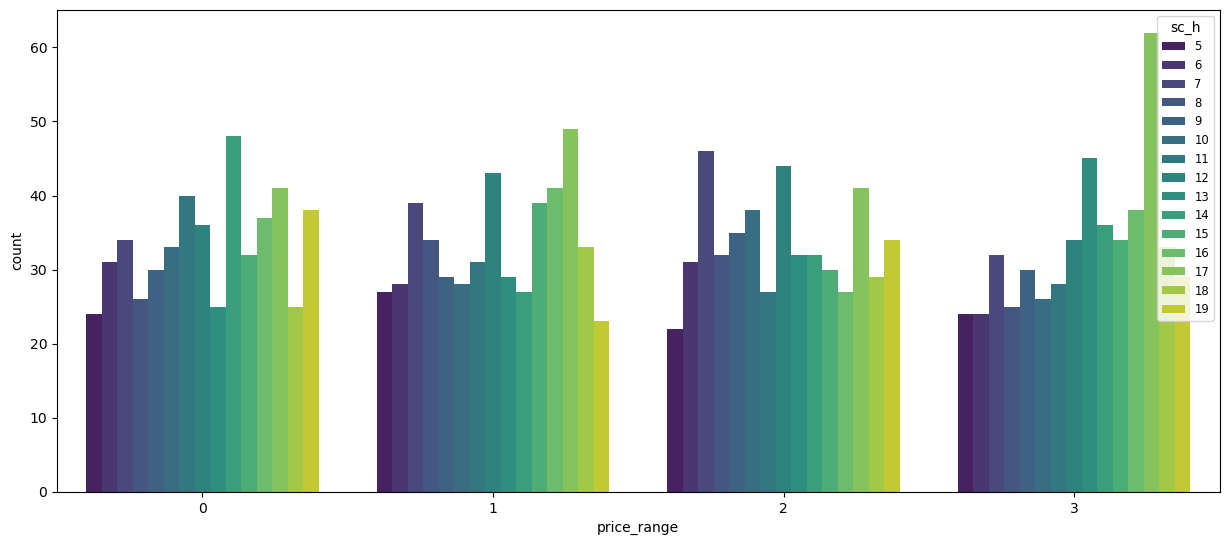

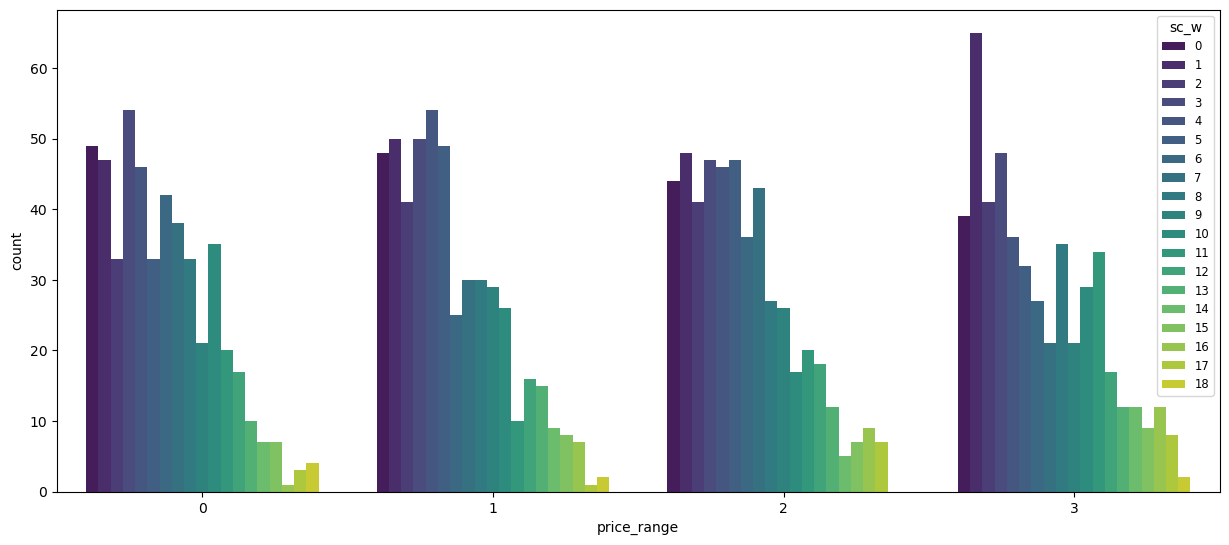

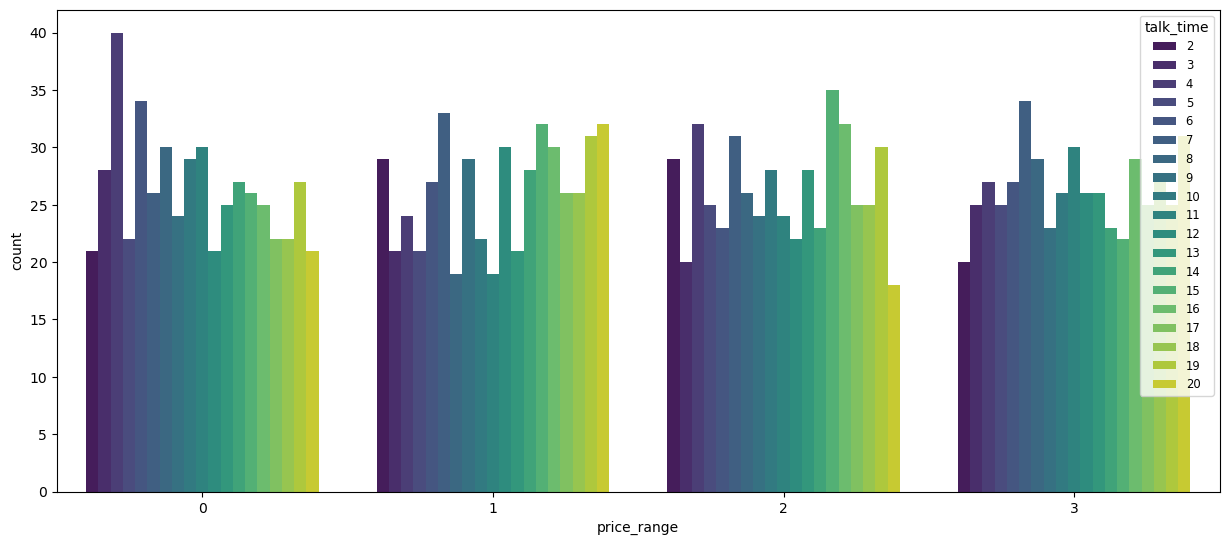

In [8]:
s_c=[]
plt.figure(figsize=(20, 0.298*len(df.columns)))
for i in features:
    if df[i].nunique()>2 and df[i].nunique()<60 and i!='price_range':
        s_c.append(i)
        plt.figure(figsize=(15, 0.298*len(df.columns)))
        sns.countplot(data=df,x='price_range',hue=i,palette='viridis')
        plt.legend(title=i,loc='upper right',fontsize='small',bbox_to_anchor=(1, 1))
        plt.show() 

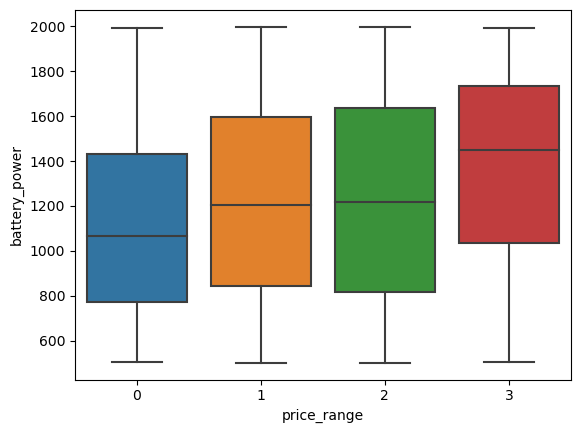

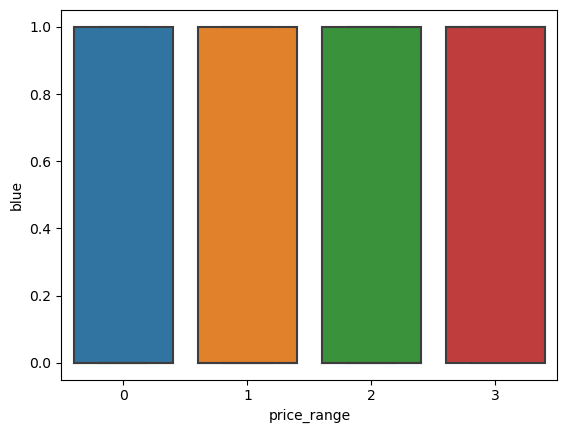

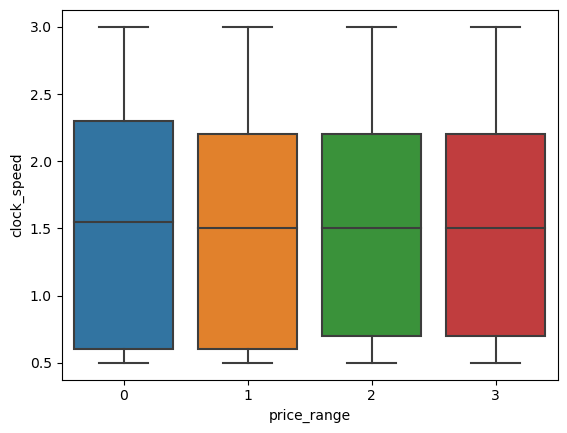

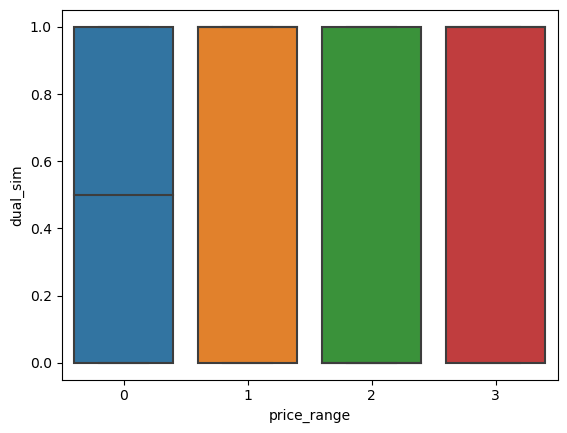

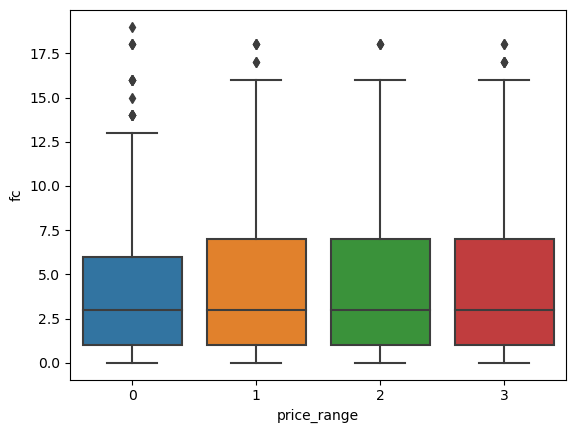

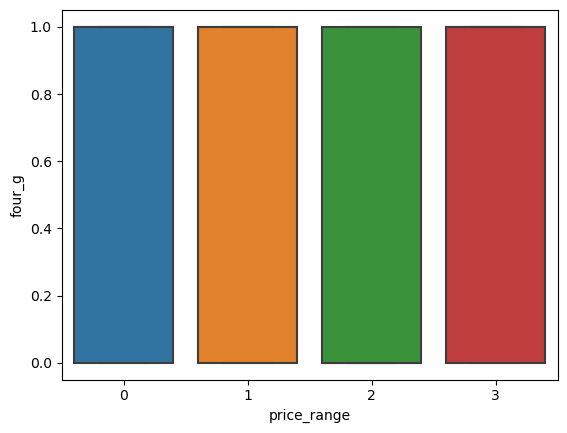

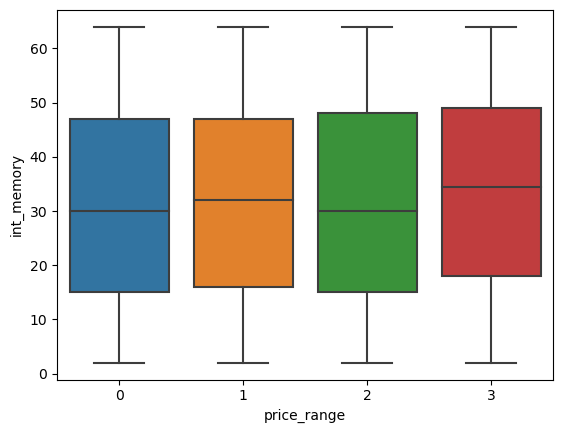

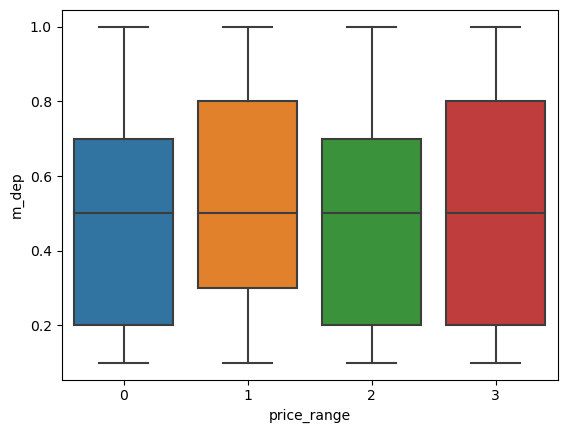

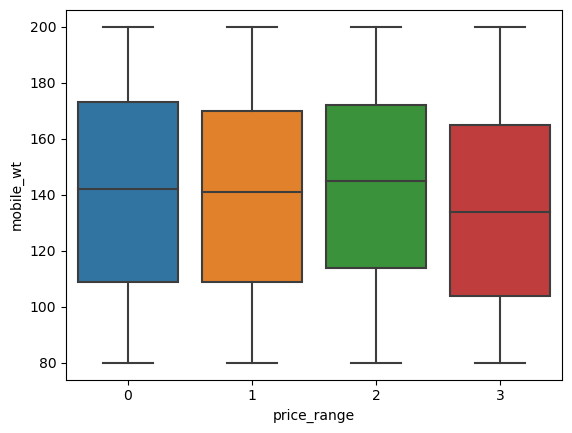

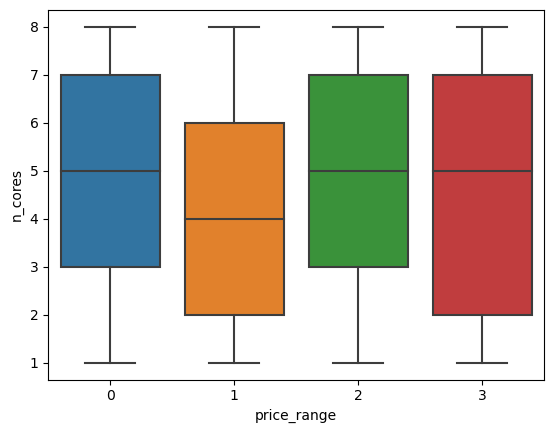

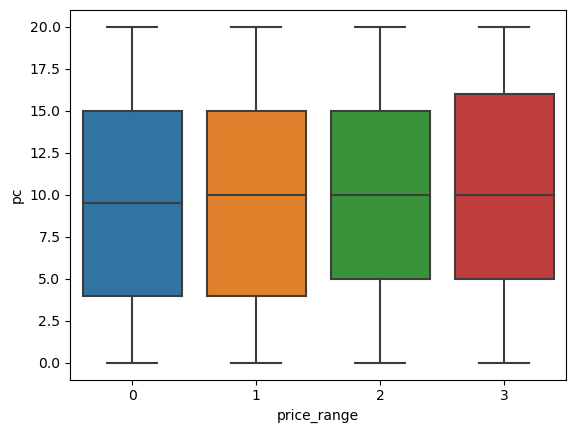

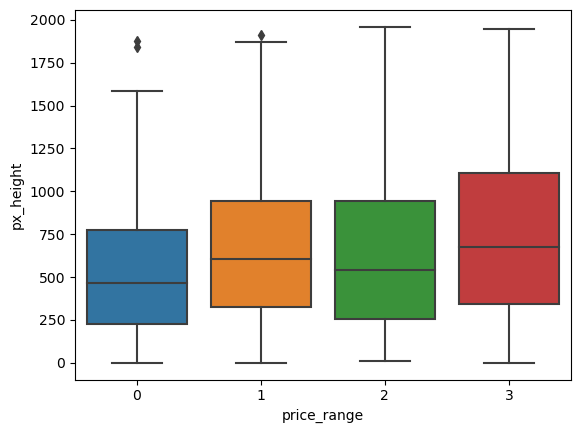

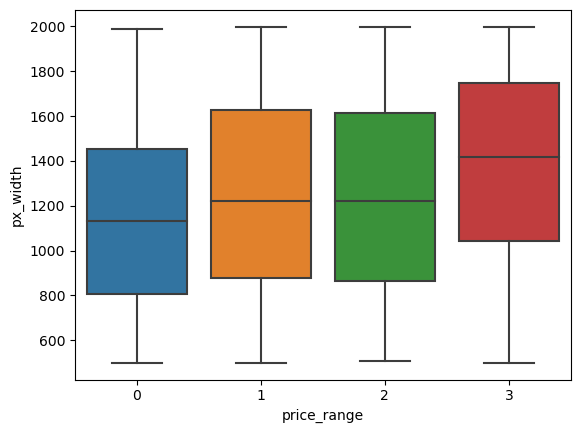

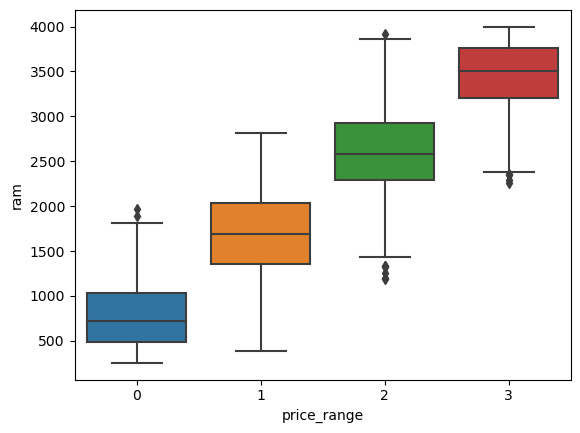

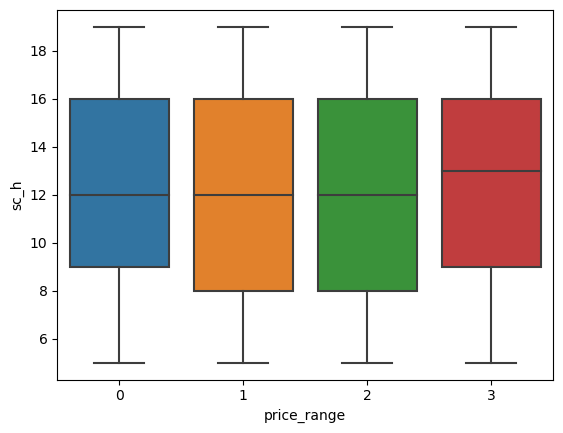

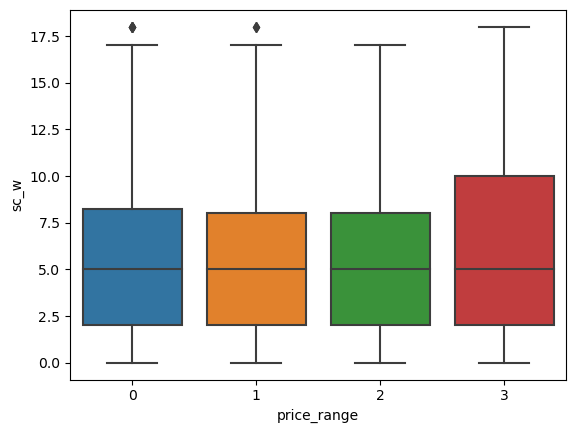

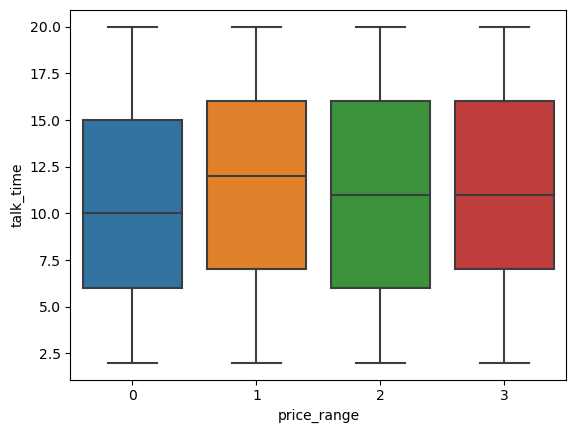

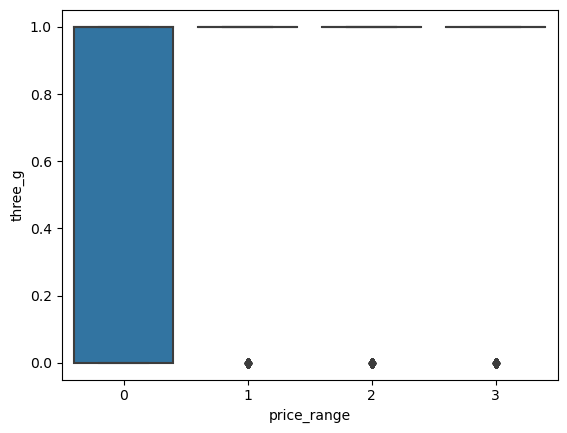

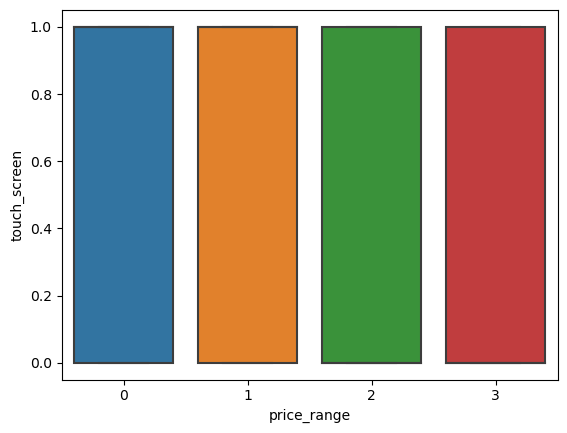

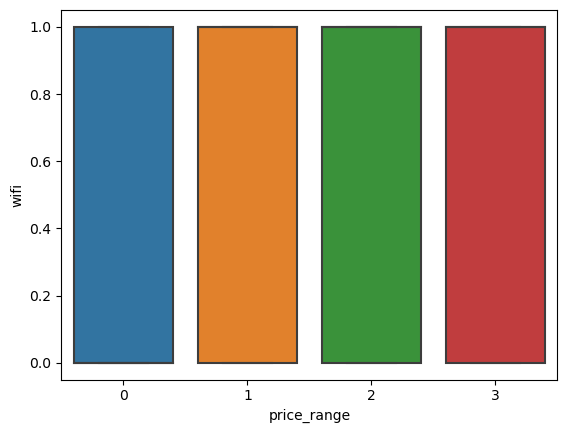

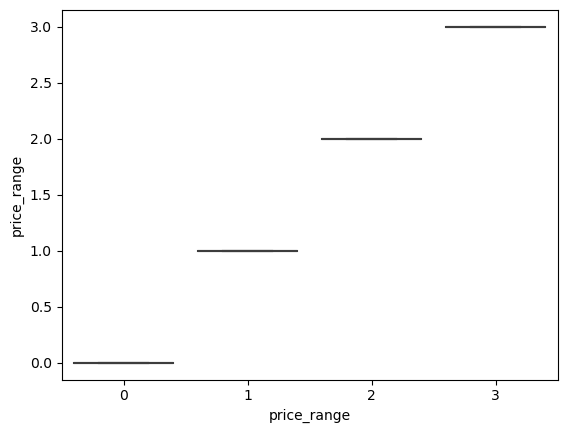

In [9]:
for i in features:
    sns.boxplot(x='price_range', y=i, data=df)
    plt.show()

<Axes: >

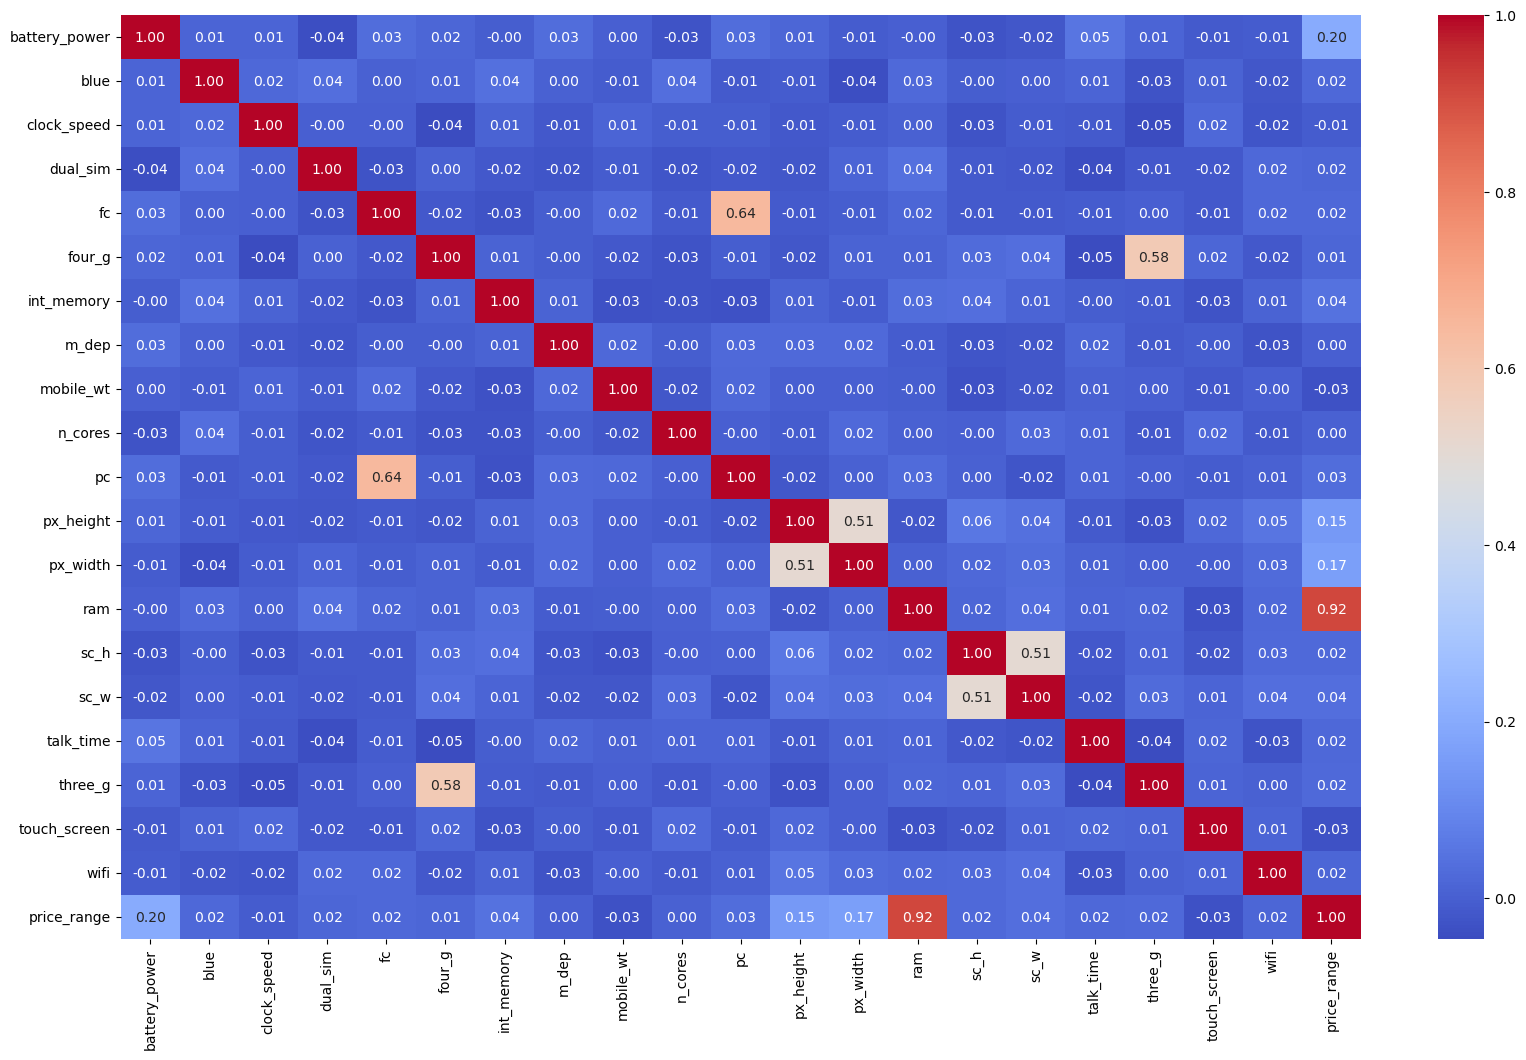

In [10]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True ,cmap='coolwarm', fmt=".2f")

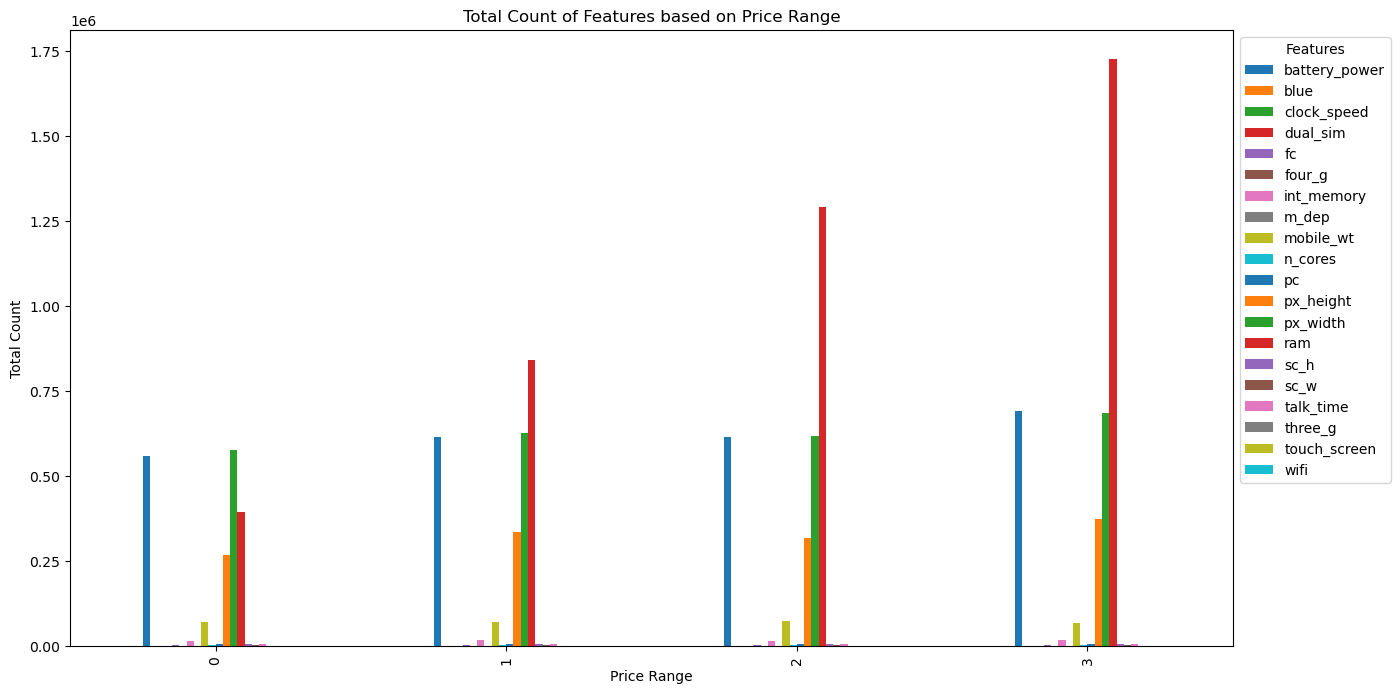

In [11]:
count_by_price_range = df.groupby('price_range').sum()
fig, ax = plt.subplots(figsize=(15, 8))
count_by_price_range.plot(kind='bar', ax=ax)
plt.title('Total Count of Features based on Price Range')
plt.xlabel('Price Range')
plt.ylabel('Total Count')
plt.legend(title='Features', bbox_to_anchor=(1, 1))
plt.show()

In [42]:
def corr_feature(df,threshold):
    c=set()
    corr=df.corr()
    for i in range(len(corr.columns)):
        for j in range (i):
            if i!=j and abs(corr.iloc[i,j]>threshold):
                name= corr.columns[i]
                c.add(name)
    return c

        

In [46]:
c=corr_feature(df,0.5)

In [47]:
c

{'pc', 'price_range', 'px_width', 'sc_w', 'three_g'}